In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

In [15]:
def dr_TASEP(L=100, a=0.3, b=0.3, P=0.3, PR=0.1, bR=0.8, timesteps=1000):
    l = np.zeros((timesteps,L))
    l[0,0]=2
    protein=np.zeros((timesteps))
    for t in range(timesteps-1):
    #timesteps, iterate the function over time, use t0 and modify t1
    #RNAP
        for r in range(L-1):
            if l[t,r] == 2 and l[t,r+1] == 0:
                if np.random.uniform(0,1) <= PR:
                        l[t+1,r] = 0
                        l[t+1,r+1] = 2
                else:
                    l[t+1,r] = 2   
        if l[t,-1] == 2:
            if np.random.uniform(0,1) <= bR:
                l[t+1,-1] = 0
            else:
                l[t+1,-1] = 2 

        #Ribosome           
        if l[t,0] == 0:
            if np.random.uniform(0,1) <= a:
                l[t+1,0] = 1           
            else:
                l[t+1,0] = 1        
        for w in range(L-1): 
            if l[t,w] == 1 and l[t,w+1] == 0:    
                if np.random.uniform(0,1) <= P:
                        l[t+1,w] = 0
                        l[t+1,w+1] = 1
                else:
                    l[t+1,w] = 1
            elif l[t,w] == 1 and l[t,w+1] != 0:
                 l[t+1,w] = 1    
        if l[t,-1] == 1:
            if np.random.uniform(0,1) <= b:
                l[t+1,-1] = 0
                protein[t] = 1
            else:
                l[t+1,-1] = 1            
        # End loop
    plt.imshow(l)
    plt.axes().set_aspect('auto')
    #color bar
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.show()

    plt.plot(np.arange(len(np.cumsum (protein,0))), np.cumsum (protein,0), 'r--')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('Protein Synthesis')
    plt.show()
    
    #Tell me what's going on fast
    
    plt.plot(np.arange(len(np.cumsum (protein,0))), np.cumsum (protein,0), 'r--')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('Protein Synthesis')
    plt.show()
    
    plt.subplot(223)
    plt.plot(np.arange(len(np.mean (l,0))), np.mean (l,0), 'ro')
    plt.axis()
    plt.xlabel('Position')
    plt.ylabel('Ribosome Mean')

    plt.subplot(221)
    plt.plot(np.arange(len(np.mean (l,1))), np.mean (l/m,1), 'r-')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('AvRibosomes/l')
    plt.suptitle('Whats going on')

    plt.subplot(222)
    plt.plot(np.arange(len(np.mean (l,1))), P*(np.mean (l,1))*(1-np.mean (l,1)), 'r-')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('J')
    plt.show()

    print("Average J =", P*np.mean (l,(0,1))*(1-np.mean (l,(0,1))))

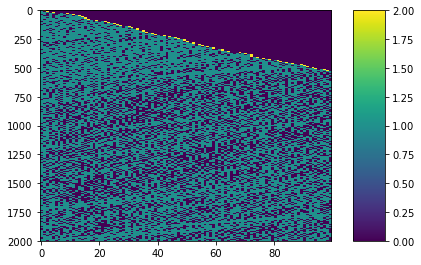

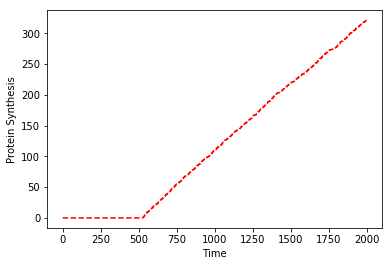

In [10]:
dr_TASEP()


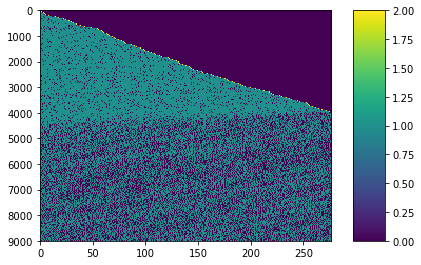

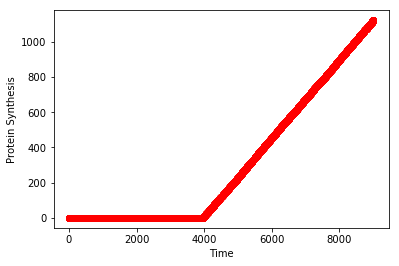

In [30]:
plt.imshow(l)
plt.axes().set_aspect('auto')
#color bar
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

plt.plot(np.arange(len(np.cumsum (protein,0))), np.cumsum (protein,0), 'r--')
plt.axis()
plt.xlabel('Time')
plt.ylabel('Protein Synthesis')
plt.show()